Emin= 0.0   Emax= 4.420974321
xmin= -0.5889   xmax= 0.5889
ymin= -0.5889   ymax= 0.5889


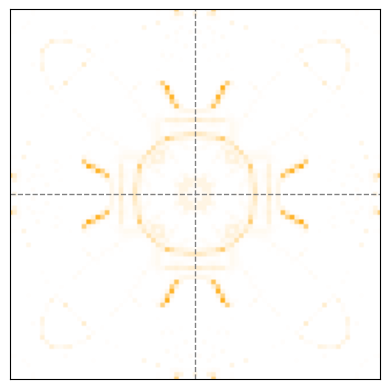

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'cm'

# Read .xy file
def read_data(file_path, x_column, y_column, E_column):
    x_values = []
    y_values = []
    E_values = []
    with open(file_path, 'r') as file:
        next(file) 
        for line in file:
            data = line.strip().split()
            if len(data) >= max(x_column, y_column, E_column):
                x_values.append(float(data[x_column - 1]))
                y_values.append(float(data[y_column - 1]))
                E_values.append(float(data[E_column - 1]))
    return x_values, y_values, E_values
    
if __name__ == '__main__':
    #home = "./anisFermi_OOOOO/"
    #home = "./anisFermi_NOOOO/"
    home = "./anisFermi_ANOOOO/"
    #home = "./anisFermi_FOOOO/"
    #home = "./anisFermi_LFOOOO/"
    #dir = "./E-008/"
    #dir = "./E-004/"
    #dir = "./E-000/"
    #dir = "./E+004/"
    #dir = "./E+008/"
    file0_path = home + dir + 'kdisgdp_n1.xy00'     # outplane
    x_column = 1  # x values
    y_column = 2  # y values
    E_column = 6  # DMP values
    
    x0_data, y0_data, E0_data = read_data(file0_path, x_column, y_column, E_column)
    x_plot = x0_data
    y_plot = y0_data
    E_plot = E0_data
        
    #set axis
    E_min = 0
    E_max = 10
    x_min = min(x_plot)
    x_max = max(x_plot)
    y_min = min(y_plot)
    y_max = max(y_plot)
    x_num = 160
    y_num = 160

    #print axis
    print("Emin=",min(E_plot),"  Emax=",max(E_plot))
    print("xmin=",min(x_plot),"  xmax=",max(x_plot))
    print("ymin=",min(y_plot),"  ymax=",max(y_plot))

    # Create a meshgrid for plotting
    x = np.linspace(x_min, x_max, num=x_num)
    y = np.linspace(y_min, y_max, num=y_num)
    X, Y = np.meshgrid(x, y)

    # Interpolate E_data to match the size of X and Y
    points = np.column_stack((x_plot, y_plot))
    E = griddata(points, E_plot, (X, Y), method='nearest')
    
    # Create a color map plot
    colors = ['white', 'orange', 'red']
    cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom', colors)
    plt.imshow(E, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=cmap_custom, vmin=E_min, vmax=E_max)
    #plt.colorbar()
    
    # Set axis
    plt.xticks([])   #plt.xticks(np.arange(-0.5, 0.6, 0.1))
    plt.yticks([])   #plt.yticks(np.arange(-0.5, 0.6, 0.1))
    #plt.xlabel(r'kx ', fontname='Times New Roman', fontsize=14)
    #plt.ylabel(r'ky ', fontname='Times New Roman', fontsize=14)

    # Set lines
    plt.axhline(0, color='gray', linestyle='--', linewidth=1.0) 
    plt.axvline(0, color='gray', linestyle='--', linewidth=1.0)

    # save/draw figure
    plt.savefig('fig.svg',bbox_inches="tight",transparent=True)
    plt.show()
    plt.clf()
    plt.close()

